PHÂN CỤM CÁC LOÀI CHIM CÁNH CỤT DỰA TRÊN TẬP DỮ LIỆU PENGUIN.CSV

In [1]:
# Cell code 1: Import các thư viện cần thiết cho xử lý
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
# K-MEANS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score

Dữ liệu ban đầu:
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

Số lượng hàng và cột:
Số hàng: 344, Số cột: 5

Danh sách các cột:
['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

Các kiểu dữ liệu của từng cột:
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Kiểm tra các giá trị NaN còn lại sau khi thay thế:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


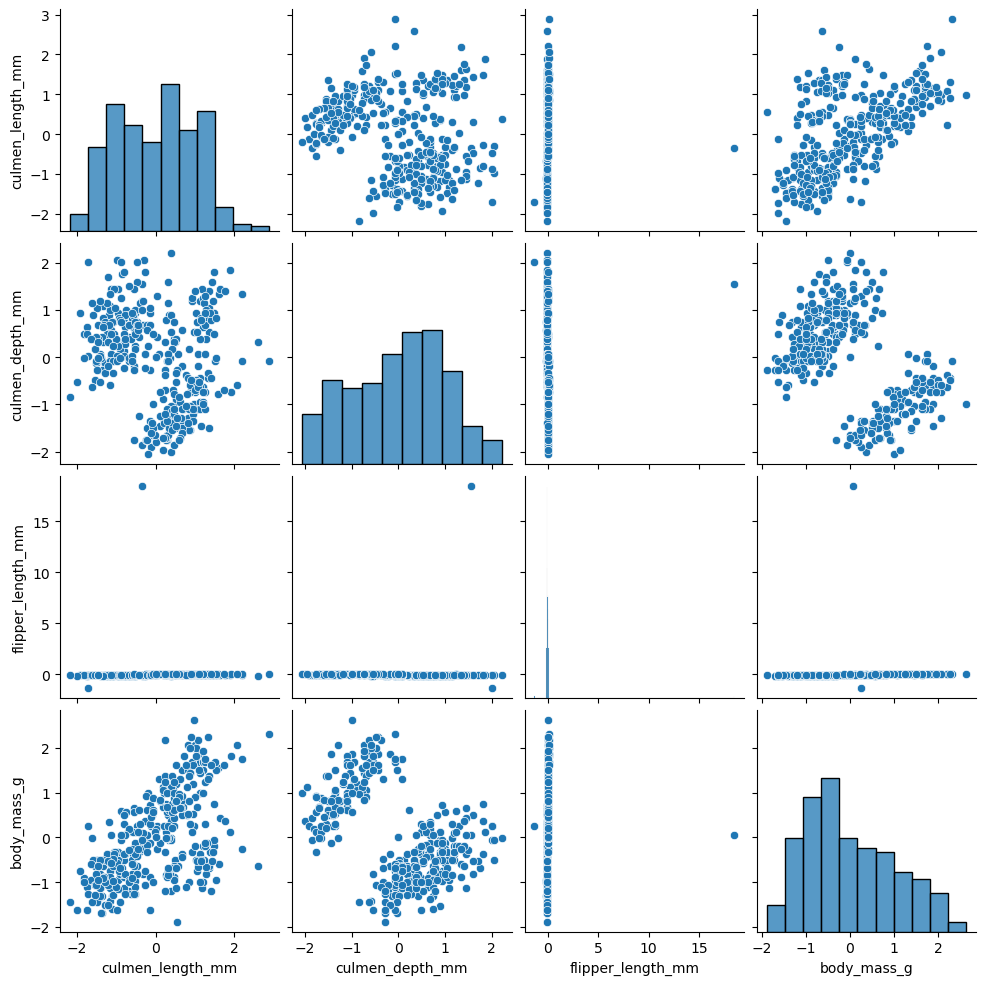

Đã loại bỏ 2 điểm ngoại biên.

Kích thước dữ liệu sau khi áp dụng PCA: (342, 2)
       PCA1      PCA2
0 -1.275685  0.054757
1 -0.866440 -0.421682
2 -1.384250 -0.140492
3 -0.006200  0.004679
4 -1.922714  0.003773


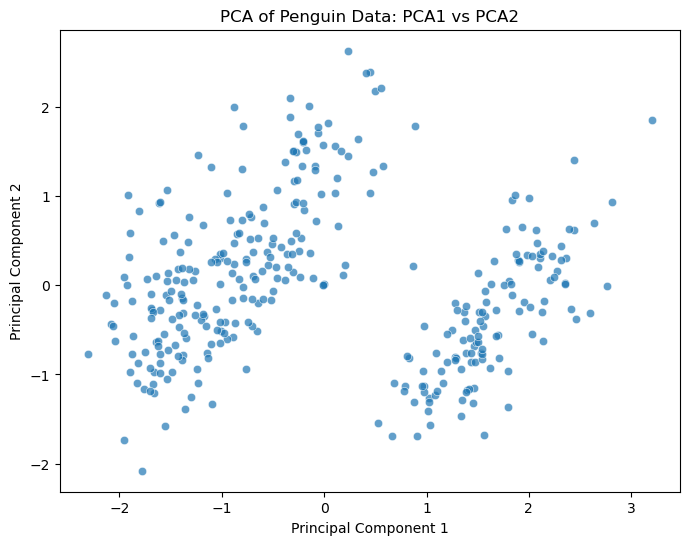


Kích thước ban đầu (trước khi loại bỏ outliers): (344, 4)
Kích thước sau khi loại bỏ outliers: (342, 4)


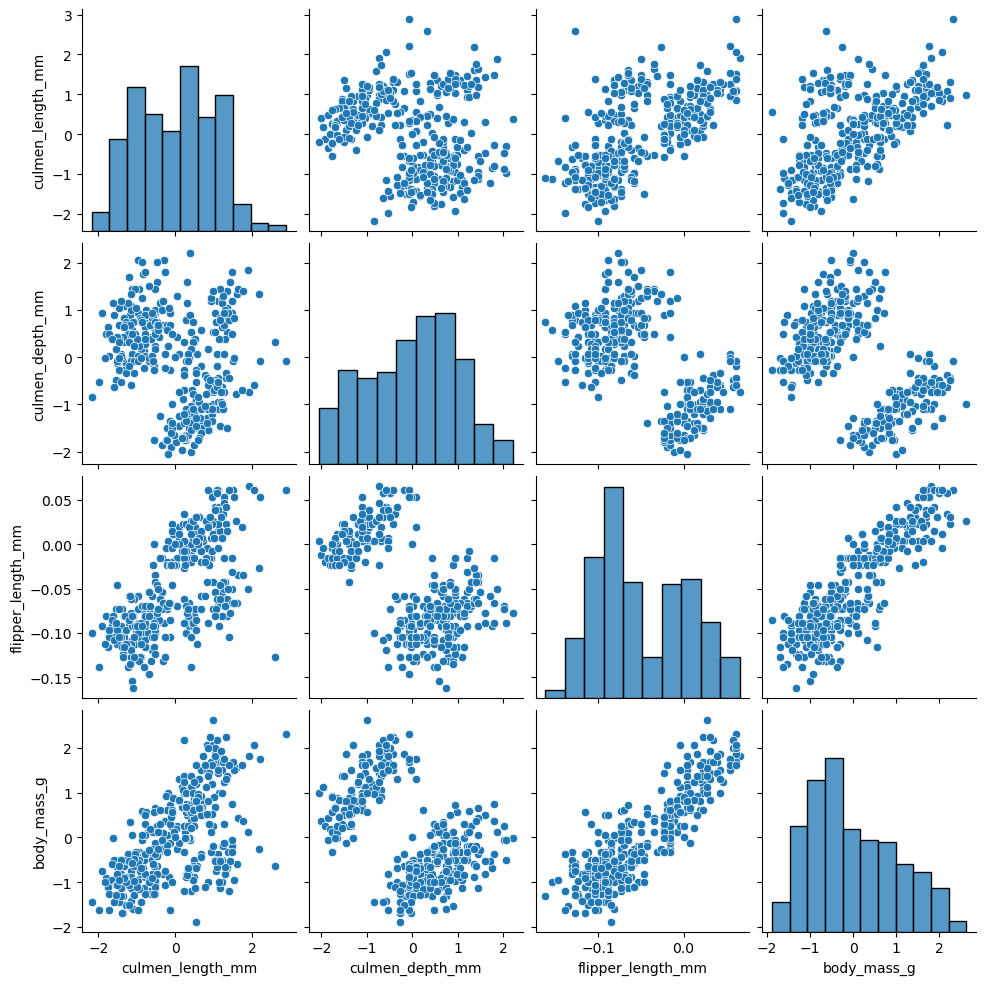

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Tắt cảnh báo SettingWithCopyWarning
pd.options.mode.chained_assignment = None

# 1. Đọc dữ liệu từ file CSV
dataFrame = pd.read_csv('penguins.csv')
print("Dữ liệu ban đầu:")
print(dataFrame.head())

# 2. Hiển thị thông tin về dữ liệu
print("\nSố lượng hàng và cột:")
print(f"Số hàng: {dataFrame.shape[0]}, Số cột: {dataFrame.shape[1]}")
print("\nDanh sách các cột:")
print(dataFrame.columns.values.tolist())
print("\nCác kiểu dữ liệu của từng cột:")
print(dataFrame.dtypes)

# Điền NaN bằng giá trị trung bình của mỗi cột số
dataFrame = dataFrame.assign(
    culmen_length_mm = dataFrame['culmen_length_mm'].fillna(dataFrame['culmen_length_mm'].mean()),
    culmen_depth_mm = dataFrame['culmen_depth_mm'].fillna(dataFrame['culmen_depth_mm'].mean()),
    flipper_length_mm = dataFrame['flipper_length_mm'].fillna(dataFrame['flipper_length_mm'].mean()),
    body_mass_g = dataFrame['body_mass_g'].fillna(dataFrame['body_mass_g'].mean()),
    sex = dataFrame['sex'].fillna(dataFrame['sex'].mode()[0])
)

print("\nKiểm tra các giá trị NaN còn lại sau khi thay thế:")
print(dataFrame.isnull().sum())

# 4. Xóa cột "sex" vì không cần thiết cho phân cụm
dataFrame = dataFrame.drop(columns=['sex'])

# 5. Chuẩn hóa dữ liệu
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
scaler = StandardScaler()
dataFrame[numeric_columns] = scaler.fit_transform(dataFrame[numeric_columns])

# Kiểm tra lại dữ liệu sau khi chuẩn hóa
print('==============================================================================')
print("\nDữ liệu sau khi chuẩn hóa:")
print(dataFrame.head())

# 6. Trực quan hóa dữ liệu để phát hiện các điểm ngoại biên (Outliers)
print('==============================================================================')
print("\nTrực quan hóa dữ liệu chuẩn hóa:")
sns.pairplot(dataFrame)
plt.show()

# 7. Sử dụng IQR để loại bỏ các điểm ngoại biên
Q1 = dataFrame[numeric_columns].quantile(0.25)
Q3 = dataFrame[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Loại bỏ các hàng có giá trị nằm ngoài phạm vi [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
df_no_outliers = dataFrame[~((dataFrame[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                             (dataFrame[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Đã loại bỏ {dataFrame.shape[0] - df_no_outliers.shape[0]} điểm ngoại biên.")

# 8. Áp dụng PCA để giảm số chiều xuống còn 2 thành phần chính (PCA1, PCA2)
print('==============================================================================')
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_no_outliers[numeric_columns])

# Tạo DataFrame từ kết quả PCA
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])

# Hiển thị thông tin về dữ liệu sau PCA
print("\nKích thước dữ liệu sau khi áp dụng PCA:", df_pca.shape)
print(df_pca.head())

# Trực quan hóa kết quả PCA bằng biểu đồ scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', alpha=0.7)
plt.title("PCA of Penguin Data: PCA1 vs PCA2")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Hiển thị kích thước dữ liệu trước và sau khi loại bỏ outliers
print("\nKích thước ban đầu (trước khi loại bỏ outliers):", dataFrame.shape)
print("Kích thước sau khi loại bỏ outliers:", df_no_outliers.shape)

# Trực quan hoá dữ liệu lần cuối
sns.pairplot(df_no_outliers)
plt.show()


Áp dụng 3 thuật toán K_Means, DBSCAN, Hierarchical Clustering

- K-Means: Phù hợp nếu như ta biết được số cụm mong muốn từ trước
- DBSCAN: Hiệu quả khi không biết số cụm và muốn loại bỏ nhiễu
- Hierarchical Clustering: Tốt khi muốn khám phá cấu trúc phân cấp của các cụm và không cần số cụm cụ thể


1. K-MEANS

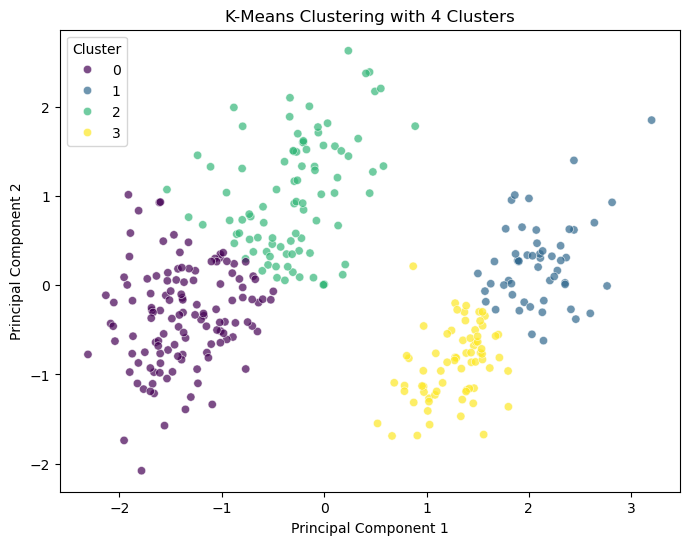

Kết quả K-Means với 4 cụm:
cluster
0    127
2     92
3     70
1     53
Name: count, dtype: int64

Vị trí của các tâm cụm (centroids):
[[-1.3682097  -0.34125645]
 [ 2.10449989  0.24048211]
 [-0.29368413  0.99921017]
 [ 1.2749011  -0.87619027]]
Inertia (SSD) của mô hình K-Means với 4 cụm: 151.43556727730564
Silhouette Score của mô hình K-Means với 4 cụm: 0.48693812764223715


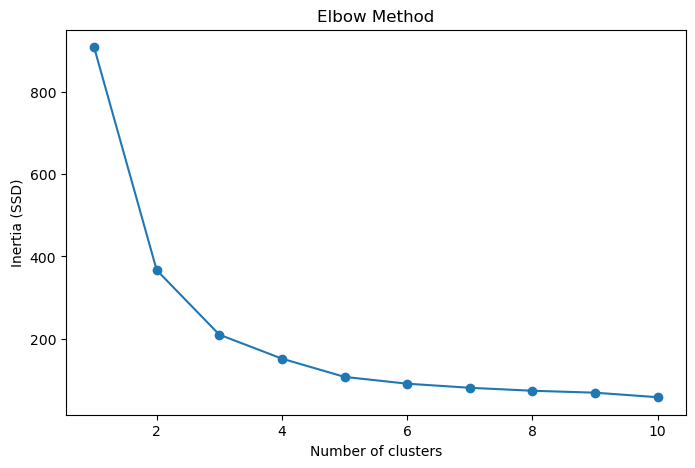

Theo như ta thấy thì ta sẽ chọn số cụm là 4 bởi vì Đường cong giảm mạnh từ k = 1 đến k = 4, cho thấy rằng việc tăng số cụm từ 1 đến 4 giúp giảm đáng kể Inertia.


In [37]:
# Cell code 3: Áp dụng K-Means vào tập dữ liệu

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# 1. Xác định số cụm. Trong ví dụ này, ta sẽ dựa trên sự đánh giá của 3 thước đo trên
n_clusters = 4

# 2. Áp dụng KMeans vào dữ liệu đã được giảm số chiều
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PCA1', 'PCA2']])

# 3. Trực quan hóa kết quả KMeans với scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7)
plt.title(f"K-Means Clustering with {n_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

print('=============================================================================')
# 4. Hiển thị thông tin về các cụm
print(f"Kết quả K-Means với {n_clusters} cụm:")
print(df_pca['cluster'].value_counts())

print('=============================================================================')
# 5. Kiểm tra vị trí của các tâm cụm (centroids)
print("\nVị trí của các tâm cụm (centroids):")
print(kmeans.cluster_centers_)

# Tính toán Inertia
print(f"Inertia (SSD) của mô hình K-Means với {n_clusters} cụm: {kmeans.inertia_}")
print('=============================================================================')
# Tính toán Silhouette Score
silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Silhouette Score của mô hình K-Means với {n_clusters} cụm: {silhouette_avg}")
print('=============================================================================')
# Vẽ Elbow Plot để tìm số cụm tối ưu
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['PCA1', 'PCA2']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method')
plt.show()
print("Theo như ta thấy thì ta sẽ chọn số cụm là 4 bởi vì Đường cong giảm mạnh từ k = 1 đến k = 4, cho thấy rằng việc tăng số cụm từ 1 đến 4 giúp giảm đáng kể Inertia.")
print('=============================================================================')


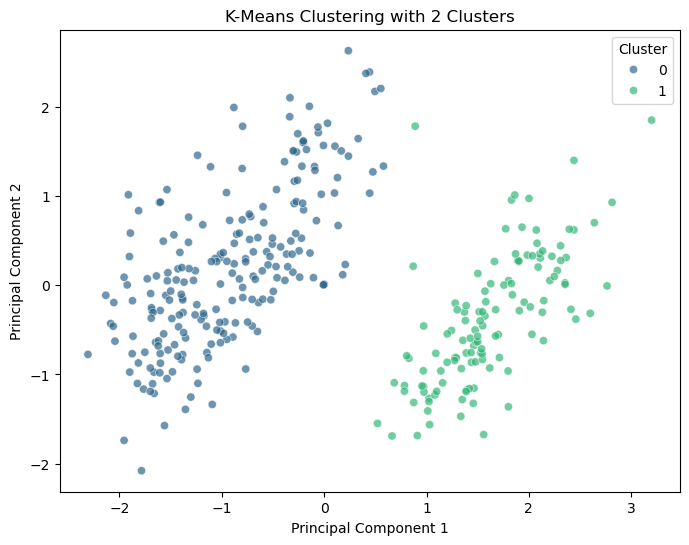

Kết quả K-Means với 2 cụm:
cluster
0    218
1    124
Name: count, dtype: int64

Vị trí của các tâm cụm (centroids):
[[-0.92509607  0.2147025 ]
 [ 1.62637857 -0.37746085]]
Inertia (SSD) của mô hình K-Means với 2 cụm: 366.79794941428355
Silhouette Score của mô hình K-Means với 2 cụm: 0.5619050201791661


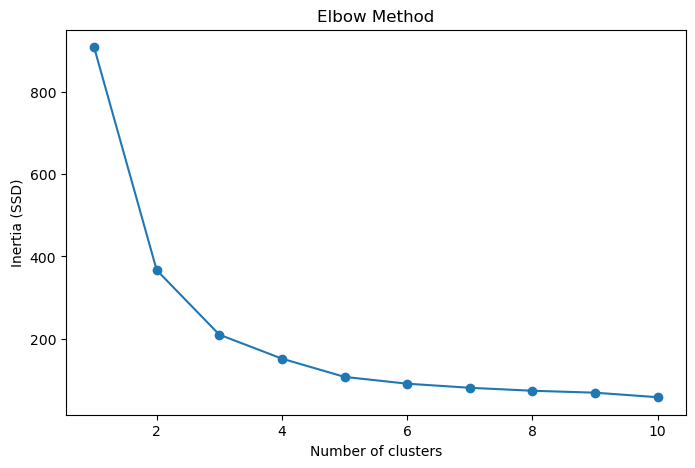

In [41]:
# Cell code 3: Áp dụng K-Means vào tập dữ liệu

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# 1. Xác định số cụm. Trong ví dụ này, ta sẽ dựa trên sự đánh giá của 3 thước đo trên
n_clusters = 2

# 2. Áp dụng KMeans vào dữ liệu đã được giảm số chiều
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['cluster'] = kmeans.fit_predict(df_pca[['PCA1', 'PCA2']])

# 3. Trực quan hóa kết quả KMeans với scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7)
plt.title(f"K-Means Clustering with {n_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

print('=============================================================================')
# 4. Hiển thị thông tin về các cụm
print(f"Kết quả K-Means với {n_clusters} cụm:")
print(df_pca['cluster'].value_counts())

print('=============================================================================')
# 5. Kiểm tra vị trí của các tâm cụm (centroids)
print("\nVị trí của các tâm cụm (centroids):")
print(kmeans.cluster_centers_)

# Tính toán Inertia
print(f"Inertia (SSD) của mô hình K-Means với {n_clusters} cụm: {kmeans.inertia_}")
print('=============================================================================')
# Tính toán Silhouette Score
silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Silhouette Score của mô hình K-Means với {n_clusters} cụm: {silhouette_avg}")
print('=============================================================================')
# Vẽ Elbow Plot để tìm số cụm tối ưu
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca[['PCA1', 'PCA2']])
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (SSD)')
plt.title('Elbow Method')
plt.show()


2. DBSCAN

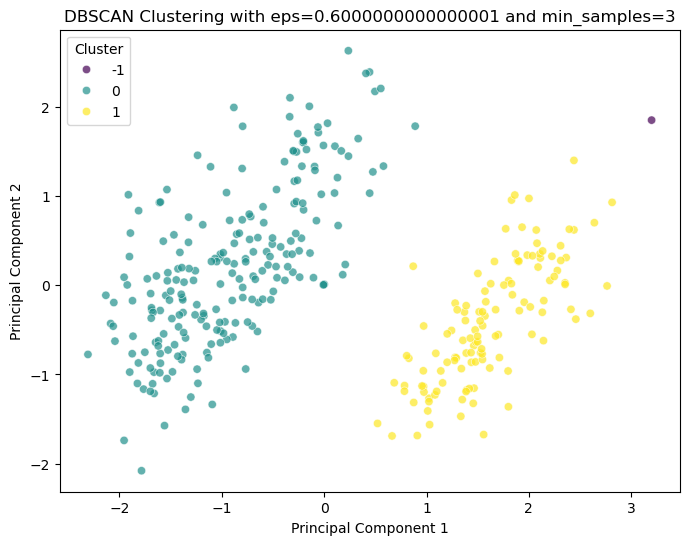

Kết quả DBSCAN với eps=0.6000000000000001 và min_samples=3:
cluster
 0    219
 1    122
-1      1
Name: count, dtype: int64
Số cụm tổng (bao gồm cả nhiễu): 3
Số cụm không tính nhiễu: 2
Số lượng điểm nhiễu: 1


In [43]:
# Cell code 5: Áp dụng DBSCAN vào tập dữ liệu

# Import thư viện DBSCAN
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Đặt các tham số cho DBSCAN
eps = 0.6000000000000001  # Bạn có thể điều chỉnh giá trị này
min_samples = 3  # Số lượng điểm tối thiểu để một điểm được coi là điểm lõi

# 2. Áp dụng DBSCAN vào dữ liệu PCA
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_pca['cluster'] = dbscan.fit_predict(df_pca[['PCA1', 'PCA2']])

# 3. Trực quan hóa kết quả phân cụm bằng DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7)
plt.title(f"DBSCAN Clustering with eps={eps} and min_samples={min_samples}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# 4. Hiển thị thông tin về các cụm
print(f"Kết quả DBSCAN với eps={eps} và min_samples={min_samples}:")
print(df_pca['cluster'].value_counts())

# 5. Kiểm tra số lượng các cụm và điểm nhiễu (-1 là điểm nhiễu)
# Số cụm tổng (bao gồm cả nhiễu)
total_clusters = len(set(df_pca['cluster']))
num_clusters_without_noise = len(set(df_pca['cluster'][df_pca['cluster'] != -1]))
num_noise_points = (df_pca['cluster'] == -1).sum()

print(f"Số cụm tổng (bao gồm cả nhiễu): {total_clusters}")
print(f"Số cụm không tính nhiễu: {num_clusters_without_noise}")
print(f"Số lượng điểm nhiễu: {num_noise_points}")


Silhouette Score: 0.40858146249582417
Davies-Bouldin Index: 0.4113854238333533
Số lượng điểm nhiễu: 1
eps=0.3, min_samples=3, Silhouette Score=0.3012, Clusters=4, Noise Points=18
eps=0.3, min_samples=4, Silhouette Score=0.2286, Clusters=4, Noise Points=22
eps=0.3, min_samples=5, Silhouette Score=0.2483, Clusters=3, Noise Points=35
eps=0.3, min_samples=6, Silhouette Score=0.4292, Clusters=2, Noise Points=43
eps=0.3, min_samples=7, Silhouette Score=0.4179, Clusters=2, Noise Points=47
eps=0.3, min_samples=8, Silhouette Score=0.4169, Clusters=2, Noise Points=48
eps=0.3, min_samples=9, Silhouette Score=0.4087, Clusters=2, Noise Points=50
eps=0.3, min_samples=10, Silhouette Score=0.3780, Clusters=3, Noise Points=55
eps=0.4, min_samples=3, Silhouette Score=0.4614, Clusters=3, Noise Points=8
eps=0.4, min_samples=4, Silhouette Score=0.4614, Clusters=3, Noise Points=8
eps=0.4, min_samples=5, Silhouette Score=0.4525, Clusters=3, Noise Points=12
eps=0.4, min_samples=6, Silhouette Score=0.5082, Clu

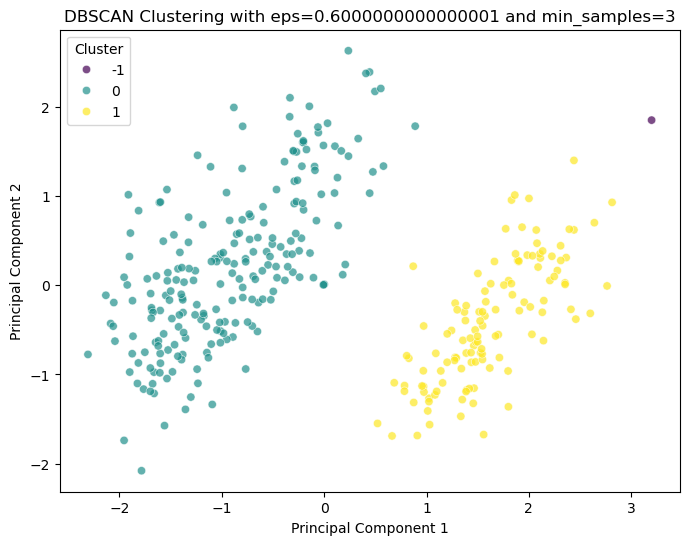

In [17]:
# Cell code 6: Áp dụng các thang đo vào đánh giá DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Tính toán các chỉ số đánh giá
silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

dbi_score = davies_bouldin_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

num_noise_points = (df_pca['cluster'] == -1).sum()
print(f"Số lượng điểm nhiễu: {num_noise_points}")

# Thử nghiệm các giá trị cho eps và min_samples
print('=============================================================================')
eps_values = np.arange(0.3, 1.0, 0.1)
min_samples_values = range(3, 11)

# Biến lưu trữ kết quả tốt nhất
best_silhouette = -1
best_eps = None
best_min_samples = None
best_model = None
best_clusters = None

# Lặp qua các giá trị eps và min_samples để tìm kiếm kết quả tốt nhất
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_pca[['PCA1', 'PCA2']])
        
        # Kiểm tra nếu có ít nhất 2 cụm (vì silhouette score chỉ có ý nghĩa khi có nhiều hơn 1 cụm)
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], labels)
            n_noise = list(labels).count(-1)  # Số lượng điểm nhiễu
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Số lượng cụm (không tính nhiễu)
            
            # In kết quả cho từng thử nghiệm (tùy chọn)
            print(f"eps={eps}, min_samples={min_samples}, Silhouette Score={silhouette_avg:.4f}, Clusters={n_clusters}, Noise Points={n_noise}")
            
            # Lưu kết quả tốt nhất
            if silhouette_avg > best_silhouette:
                best_silhouette = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_model = dbscan
                best_clusters = labels

# Hiển thị kết quả tốt nhất
print('===================================================')
print(f"Kết quả tốt nhất:")
print(f"eps = {best_eps}, min_samples = {best_min_samples}")
print(f"Silhouette Score = {best_silhouette:.4f}")
print(f"Số lượng cụm = {len(set(best_clusters)) - (1 if -1 in best_clusters else 0)}")
print(f"Số lượng điểm nhiễu = {list(best_clusters).count(-1)}")

# Vẽ biểu đồ phân cụm tốt nhất
df_pca['best_cluster'] = best_clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='best_cluster', palette='viridis', alpha=0.7)
plt.title(f"DBSCAN Clustering with eps={best_eps} and min_samples={best_min_samples}")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


3. Hierarchical Clustering

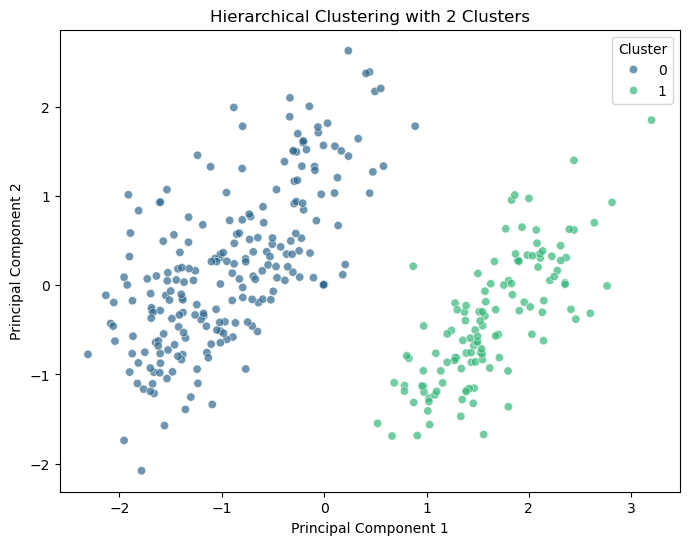

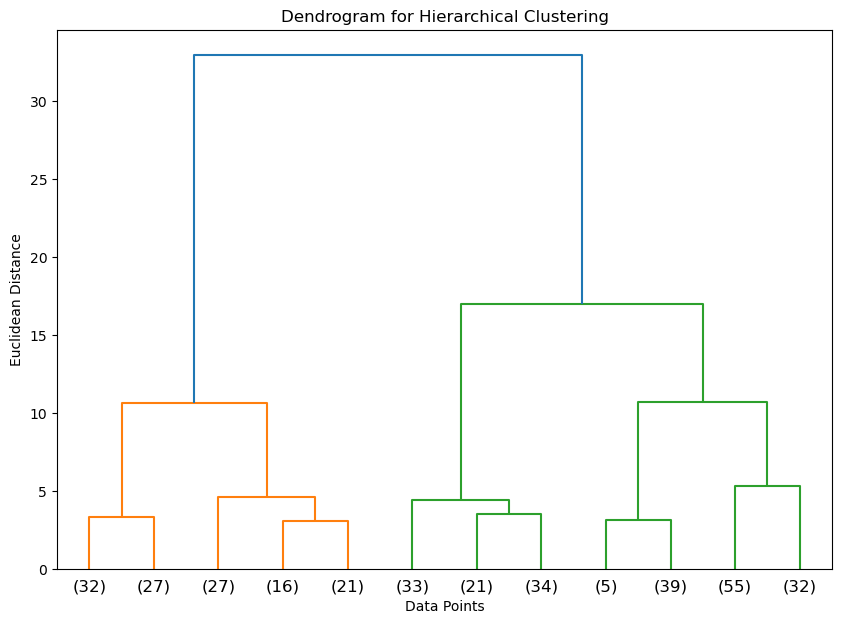

Kết quả Hierarchical Clustering với 2 cụm:
cluster
0    219
1    123
Name: count, dtype: int64
Số cụm tổng (bao gồm cả nhiễu, nếu có): 2


In [23]:
# Cell code 7: Áp dụng Hierarchical Clustering vào tập dữ liệu

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# Số cụm có thể điều chỉnh 
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
df_pca['cluster'] = hc.fit_predict(df_pca[['PCA1', 'PCA2']])

# Trực quan hóa kết quả phân cụm bằng Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7)
plt.title(f"Hierarchical Clustering with {n_clusters} Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

# Tạo dendrogram để thấy rõ cấu trúc phân cụm (không bắt buộc)
linked = linkage(df_pca[['PCA1', 'PCA2']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=12, show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

# In kết quả phân cụm
print(f"Kết quả Hierarchical Clustering với {n_clusters} cụm:")
print(df_pca['cluster'].value_counts())

# Kiểm tra số lượng các cụm và in ra thông tin
total_clusters = len(set(df_pca['cluster']))
print(f"Số cụm tổng (bao gồm cả nhiễu, nếu có): {total_clusters}")


Silhouette Score: 0.5625056421851319
Davies-Bouldin Index: 0.6615591660842584

Đánh giá với 2 cụm:
Silhouette Score với 2 cụm: 0.5625056421851319
Davies-Bouldin Index với 2 cụm: 0.6615591660842584


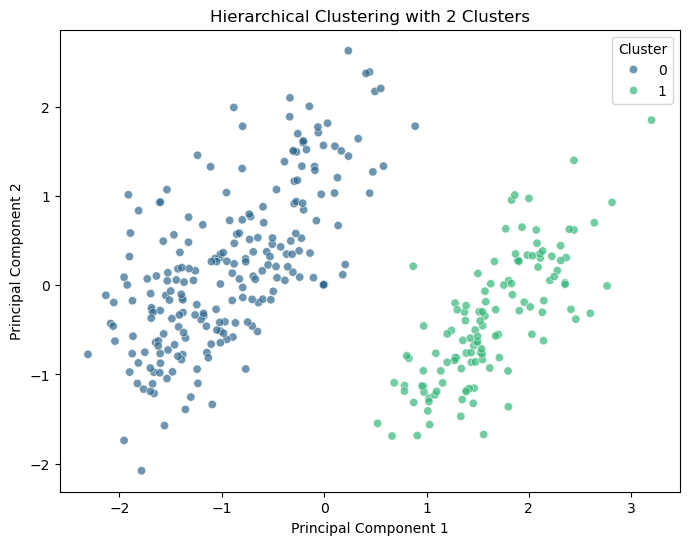


Đánh giá với 3 cụm:
Silhouette Score với 3 cụm: 0.48590371060157556
Davies-Bouldin Index với 3 cụm: 0.7365116712259239


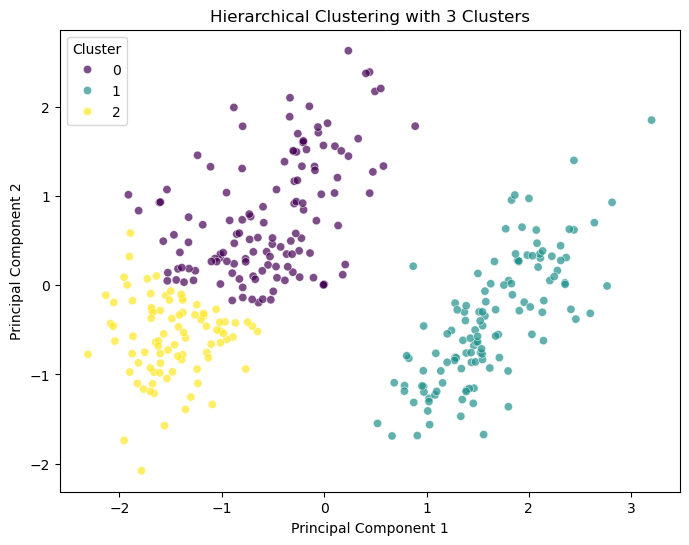


Đánh giá với 4 cụm:
Silhouette Score với 4 cụm: 0.47819659324070757
Davies-Bouldin Index với 4 cụm: 0.7463574923832972


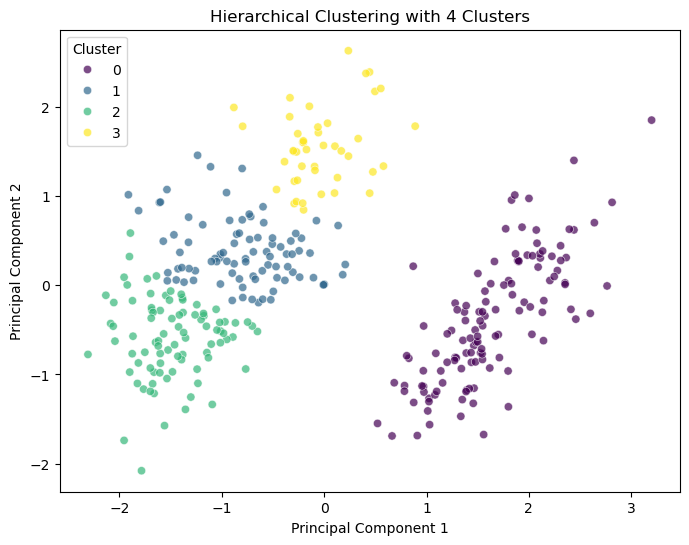

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Cell code 8: 

# Tính toán Silhouette Score
silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Tính toán Davies-Bouldin Index
dbi_score = davies_bouldin_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Davies-Bouldin Index: {dbi_score}")

print('===================================================')
# Tính toán các chỉ số phân cụm lân cận (so sánh giữa 2, 3 và 4)
def evaluate_hierarchical_clustering(n_clusters):
    hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    df_pca['cluster'] = hc.fit_predict(df_pca[['PCA1', 'PCA2']])

    # Tính toán Silhouette Score
    silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
    print(f"Silhouette Score với {n_clusters} cụm: {silhouette_avg}")

    # Tính toán Davies-Bouldin Index
    dbi_score = davies_bouldin_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
    print(f"Davies-Bouldin Index với {n_clusters} cụm: {dbi_score}")

    # Trực quan hóa
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', alpha=0.7)
    plt.title(f"Hierarchical Clustering with {n_clusters} Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster')
    plt.show()

# Đánh giá với 2, 3, 4 cụm
print("\nĐánh giá với 2 cụm:")
evaluate_hierarchical_clustering(2)

print('===================================================')
print("\nĐánh giá với 3 cụm:")
evaluate_hierarchical_clustering(3)

print('===================================================')
print("\nĐánh giá với 4 cụm:")
evaluate_hierarchical_clustering(4)


GIẢI THÍCH CÁC THUẬT NGỮ:



IQR (Interquartile Range): hay là khoảng tứ phân vị là một phương pháp thông kê được sử dụng để xác định độ phân tán của dữ liệu và phát hiện các điểm ngoại biên (outliers). Đây là một kỹ thuật phổ biến để lọc dữ liệu bất thường, đặc biệt khi dữ liệu không theo phân phối chuẩn.

Ý nghĩa: IQR là khoảng cách giữa hai tứ phân vị:
- Q1 (quartile 1): giá trị tại ví trí 25% của dữ liệu (phân vị thứ nhất).
- Q3 (quartile 3): giá trị tại vị trí 75% của dữ liệu (phân vị thứ ba).
- IQR = Q3 - Q1: thể hiện độ rộng của khoảng tứ phân vụ thứ nhất đến thứ ba.
- Trong một phân phối dữ liệu, IQR đo lường độ trải rộng của dữ liệu trung tâm, giúp loại bỏ các giá trị cực đoan, tập trung vào phần lớn dữ liệu. Các giá trị nằm ngoài khoảng tính toán (IQR = Q3 - Q1) sẽ được coi là ngoại biên.

 Tác dụng: Khi phát hiện ngoại biên bằng IQR, các giá trị nằm ngoài phạm vi [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] được xem là ngoại biên vì chúng nằm quá xa so với phần lớn của dữ liệu. Giá trị thấp hơn [Q1 - 1.5 * IQR] sẽ được coi là ngoại biên ở phía dưới và giá trị cao hơn [Q3 + 1.5 * IQR] được coi là ngoại biên ở phía trên.
- Đơn giản và hiệu quả: IQR là phương pháp không yêu cầu phải giả định dữ liệu phải có phân phối chuẩn, do đó rất hữu ích cho các tập dữ liệu có phân phối bất đối xứng hoặc có nhiều giá trị cực đoan.
- Loại bỏ các ngoại biên: Giảm thiểu tác động của các giá trị bất thường, giúp mô hình phân tích chính xác hơn.



==========================================================================================================================================

PCA (Principle Component Analysis): là một kỹ thuật giảm số chiều phổ biến trong học máy và thống kê. Nó biến đổi dữ liệu gốc thành các trục mới (thành phần chính) sao cho.
- Thành phần đầu tiên (PCA1): chứa phần lớn phương sai của dữ liệu
- Thành phần thứ hai (PCA2): chứ phương sai lớn nhất tiếp theo và vuông góc với thành phần đầu tiên.
- Bằng cách giảm số chiều, PCA giúp tối ưu hoá hiệu năng của các thuật toán, đặc biệt khi làm việc với dữ liệu nhiều chiều và dễ bị ảnh hưởng bởi nhiễu.

Các bước chính trong quá trình tính toán PCA:
- Chuẩn hoá dữ liệu: Nếu các đặc trưng có các thang đo khác nhau, PCA thường yêu cầu dữ liệu được chuẩn hoá để mỗi đặc trưng có phương sai gần bằng 1.
- Tính ma trận hiệp phương sai: Giả sử dữ liệu đã chuẩn hoá là X ( ma trận có kích thường m x n, trong đó m là số mẫu và n là số chiều), ma trận hiệp phương sai được tính Cov(X) = 1 / ( m - 1) * Xt*X
- Tính toán các giá trị riêng và vector riêng: Tìm các giá trị riêng (lambda) và vector riêng (v) của ma trận hiệp phương sai Cov(X)*v = lambda * v . Vector riêng v là các trục chính mà dữ liệu sẽ được chiếu lên. Giá trị lambda cho biết lượng phương sai mà các vector riêng đó giải thích.
- Sắp xếp các vector riêng theo giá trị riêng giảm dần. Vector riêng với giá trị cao nhất sẽ là thành phần chính đầu tiên, giải thích phương sai lớn nhất của dữ liệu.
- Chọn số lượng thành phần chính (vector riêng) dựa trên phương sai giải thích mong muốn.
- Chiếu dữ liệu lên các thành phần chính: Ma trận dữ liệu sau khi được giảm chiều được tính bằng cách nhân với dữ liệu gốc X với ma trận các vector riêng đã chọn Xnew = X * V (trong đó V là ma trận các vector riêng).

Tác dụng:
- Giảm số chiều của dữ liệu, giữ lại những đặc trưng quan trọng nhất, từ đó làm giảm kích thước dữ liệu và giúp thuật toán ML hoạt động hiệu quả hơn. Ngoài ra việc giảm số chiều còn giảm nguy cơ bị overfitting khi mô hình có quá nhiều đặc trưng không cần thiết.
- Tăng tốc độ xử lý của mô hình do dữ liệu mà ta đã xử lý đã ít chiều hơn giúp giảm thời gian tính toán và yêu cầu bộ nhớ cho các thuật toán, đặc biệt là khi làm việc với các mô hình yêu cầu nhiều tính toán như là hồi quy, phân cụm và mạng nơ ron.
- Loại bỏ nhiễu bởi vì do chỉ tập trung vào các thành phần có phương sai lớn nhất, PCA có thể loại bỏ các đặc trưng có phương sai thấp, thường sẽ là nhiễu, giúp tăng độ chính xác của mô hình.
- Trực quan hoá dữ liệu do PCA cho phép chiếu dữ liệu đa chiều (nhiều hơn 3 chiều) xuống không gian 2 hoặc 3 chiều giúp dễ dàng trực quan hoá dữ liệu và tìm hiểu cấu trúc hoặc các cụm clusters trong dữ liệu
- Phân tích mối quan hệ giữa các biến vì PCA có thể làm lộ các mối quan hệ tiềm ẩn giữa các biến bằng cách phát hiện các trục chính mà dữ liệu phân bố mạnh nhất. Các trục chính này có thể chỉ ra các mô hình hoặc xu hướng trong dữ liệu mà trước đó có thể chưa được nhận ra.

==========================================================================================================================================

Inertia là một đại lượng đo lường thường được sử dụng trong thuật toán phân cụm K-Means để đánh giá chất lượng của các cụm. Inertia đo tổng khoảng cách bình phương giữa các điểm dữ liệu và centroid của cụm mà chúng thuộc về. Nó còn được gọi là Within-Cluster Sum of Squares (WCSS).

Tác dụng:
- Đo lường chất lượng phân cụm: Inertia cung cấp một thước đo để đánh giá mức độ phân tán của các điểm dữ liệu trong cụm. Nếu Inertia nhỏ thì các điểm dữ liệu trong cụm gần nhau và gần với centroid của các cụm, nghĩa là cụm có sự đồng nhất cao. Ngược lại thì các điểm dữ liệu có sự phân tán cao và có ít cụm đồng nhất.
- Xác định số lượng cụm tối ưu (K): Inertia thường được sử dụng cùng với Elbow Method để xác định số lượng cụm tối ưu cho K-Means. Trong phương pháp này ta tính Inertia với các giá trị K khác nhau, rồi vẽ đồ thị Inertia theo K. Khi K tăng thì Inertia sẽ giảm dần vì các cụm càng nhỏ, các điểm trong cụm càng gần centroid hơn. Tuy nhiên, K tăng đến một mức nào đó độ giảm Inertia sẽ trở nên rất ít và không còn hiệu quả. Điểm mà Inertia bắt đầu giảm chậm hơn là "khuỷu tay", đại diện cho số cụm tối ưu.
- So sánh kết quả phân cụm: Inertia giúp so sánh các kết quả phân cụm từ các lần chạy K-Means khác nhau (với các centroid khởi tạo khác nhau) hoặc các giá trị K khác nhau. Người dùng có thể chọn 

Ưu điểm:
- Dễ tính toán và sử dụng: Inertia là một tiêu chí đơn giản, dễ hiểu và dễ tính toán, giúp đánh giá độ chặt chẽ của các cụm
- Phù hợp với các phương pháp Elbow: Inertia là chỉ số chính trong Elbow Method, một phương pháp trực quan và phổ biến để chọn số cụm tối ưu trong K-Means

Nhược điểm:
- Không phản ứng hết được chất lượng cụm: Inertia chỉ xem xét khoảng cách trong cụm và không tính đến khoảng cách giữa các cụm, nên có thể không đánh giá chính xác độ tách biệt của các cụm.
- Không hiệu quả cho các cụm có hình không hình cầu: K-Means và Inertia phù hợp nhất khi các cụm có dạng hình cầu và kích thước tương đương. Với dữ liệu có cụm không đồng đều hoặc không có hình dạng rõ ràng, Inertia có thể không phản ánh đúng chất lượng cụm.

=> Inertia là một chỉ số quan trọng giúp đánh giá và tối ưu hóa các cụm trong K-Means. Nó đo lường độ chặt chẽ của các cụm và có thể được sử dụng để chọn số lượng cụm tối ưu bằng phương pháp Elbow. Tuy nhiên, inertia có hạn chế với dữ liệu phức tạp hoặc khi các cụm không có hình dạng đồng đều.

==========================================================================================================================================

Sihouette Score là một chỉ số dùng để đánh giá hiệu quả của phương pháp phân cụm, đo lường sự gắn kết giữa các điểm trong cùng 1 cụm và sự tách biệt giữa các cụm. Chỉ số này có thể áp dụng cho bất kì thuật toán phân cụm nào, không chỉ riêng K-Means. Sihouette Score cung cấp thông tin về mức độ phù hợp của từng điểm dữ liệu với cụm mà nó được gán vào so với các cụm khác. Giá trị này nằm trong khoảng -1 đến 1:
- Silhouette Score gần 1: Các điểm dữ liệu trong cụm được phân cụm tốt, với sự tách biệt rõ ràng với các cụm khác.
- Silhouette Score gần 0: Các điểm dữ liệu nằm gần ranh giới giữa hai cụm, cho thấy phân cụm không rõ ràng.
- Silhouette Score gần -1: Các điểm dữ liệu có thể bị gán nhầm cụm, vì chúng gần với các cụm khác hơn là cụm của chính nó.

Tác dụng:
- Đo lường chất lượng phân cụm: Silhouette Score cung cấp thông tin về chất lượng của phân cụm bằng cách xem xét cả độ gắn kết trong cụm và độ tách biệt giữa các cụm. Nếu các điểm dữ liệu nằm gần nhau trong cùng một cụm và tách biệt rõ ràng với các cụm khác, Silhouette Score sẽ cao, cho thấy cụm có chất lượng tốt.
- Xác định số cụm tối ưu K: Silhouette Score có thể được sử dụng để chọn số lượng cụm tối ưu mà không cần dựa vào phương pháp Elbow (với chỉ số Inertia). Bằng cách tính Silhouette Score cho các giá trị 𝐾 khác nhau và chọn giá trị 𝐾 có Silhouette Score cao nhất, ta có thể xác định số lượng cụm tối ưu một cách trực quan hơn.
- So sánh các thuật toán phân cụm: Silhouette Score có thể được sử dụng để so sánh hiệu quả của các thuật toán phân cụm khác nhau, chẳng hạn như K-Means, DBSCAN, Agglomerative Clustering,... Thuật toán nào có Silhouette Score cao hơn thì thuật toán đó phù hợp hơn với dữ liệu.
- Kiểm tra tính phù hợp phân cụm với dữ liệu: Silhouette Score trung bình cho toàn bộ dữ liệu có thể giúp đánh giá liệu dữ liệu có thực sự phù hợp để phân cụm hay không. Nếu Silhouette Score trung bình thấp (gần 0 hoặc âm), có thể dữ liệu không có cấu trúc phân cụm rõ ràng, hoặc số lượng cụm hiện tại không tối ưu.

Ưu điểm:
- Dễ hiểu và dễ tính toán: Silhouette Score là một chỉ số đơn giản, dễ tính toán và dễ hiểu, giúp đánh giá chất lượng của cụm một cách trực quan.
- Có thể sử dụng cho nhiều thuật toán phân cụm khác nhau: Silhouette Score không phụ thuộc vào thuật toán phân cụm cụ thể và có thể áp dụng cho nhiều phương pháp phân cụm.
- Không yêu cầu xác định số cụm trước: Không như Elbow Method, Silhouette Score không cần phải biết số lượng cụm tối ưu trước mà có thể giúp xác định số cụm tối ưu.

Nhược điểm:
- Phức tạp với dữ liệu lớn: Việc tính toán khoảng cách giữa các điểm có thể tốn thời gian và tài nguyên với các tập dữ liệu lớn hoặc có nhiều cụm.
- Không phù hợp với các cụm có hình dạng phức tạp: Silhouette Score dựa trên khoảng cách trung bình giữa các cụm và không làm việc tốt với các cụm có hình dạng không hình cầu hoặc kích thước khác nhau.
- Bị ảnh hưởng bởi nhiễu: Silhouette Score có thể bị ảnh hưởng bởi các điểm nhiễu và các cụm có mật độ khác nhau, dẫn đến việc đánh giá không chính xác.

=> Silhouette Score là một chỉ số quan trọng giúp đánh giá chất lượng của phân cụm và xác định số cụm tối ưu trong các bài toán phân cụm. Tuy nhiên, nó cũng có một số hạn chế với các dữ liệu lớn hoặc có hình dạng phức tạp.


==========================================================================================================================================

Davies-Bouldin Index (DBI) là một chỉ số dùng để đánh giá chất lượng của phân cụm, đo lường mức độ gắn kết giữa các điểm trong cùng cụm và sự tách biệt giữa các cụm khác nhau. Không giống như Sihouette, DBI càng thấp càng tốt, vì nó cho biết các cụm gắn kết tốt và cách xa nhau. VàDBI được tính toán như sau:
- Tính toán độ rộng của từng cụm
- Tính toán độ tương đồng giữa các cụm (Cluster Similarity)
- Tính toán chỉ số Davies-Bouldin cho mỗi cụm
- Tính toán Davies-Bouldin tổng thể

Tác dụng:
- Đánh giá chất lượng phân cụm: Davies-Bouldin Index cho phép đánh giá chất lượng của phân cụm bằng cách đo lường độ gắn kết trong cụm và độ tách biệt giữa các cụm. Giá trị DBI nhỏ cho thấy các cụm được phân chia tốt, các điểm dữ liệu trong cùng cụm gắn kết với nhau và các cụm khác tách biệt rõ ràng.
- Chọn số lượng cụm tối ưu K: DBI cũng có thể được sử dụng để xác định số lượng cụm tối ưu. Người dùng có thể thử nhiều giá trị của 𝐾 và chọn giá trị 𝐾 có DBI nhỏ nhất. Điều này cho thấy sự phân cụm tốt nhất cho tập dữ liệu.
- So sánh các thuật toán phân cụm: DBI giúp so sánh chất lượng của các thuật toán phân cụm khác nhau. Thuật toán nào có DBI thấp hơn sẽ có kết quả phân cụm tốt hơn.

Ưu điểm: 
- Dễ hiểu và dễ sử dụng: DBI là một chỉ số đơn giản và trực quan, giúp đánh giá chất lượng phân cụm mà không cần phải dựa trên dữ liệu được gán nhãn.
- Không yêu cầu phân cụm có hình dạng cố định: DBI có thể áp dụng cho các cụm có hình dạng khác nhau, vì nó dựa trên khoảng cách trung bình giữa các cụm thay vì giả định các cụm có hình cầu.
- Tính toán nhanh chóng: DBI có thể tính toán một cách tương đối nhanh, đặc biệt phù hợp cho các bài toán phân cụm lớn.

Nhược điểm:
- Nhạy cảm với cụm có kích thước và mật độ không đồng đều: Nếu các cụm có kích thước và mật độ khác nhau, DBI có thể cho kết quả sai lệch, vì nó không điều chỉnh cho các cụm không đồng đều.
- Dễ bị ảnh hưởng bởi nhiễu và outliers: DBI sử dụng khoảng cách trung bình, nên dễ bị ảnh hưởng bởi các điểm nhiễu (noise) hoặc điểm ngoại biên (outliers), khiến cho chỉ số này không phản ánh đúng chất lượng của phân cụm.
- Khó sử dụng cho dữ liệu phức tạp: Với các tập dữ liệu có cụm phức tạp hoặc phân bố không rõ ràng, DBI có thể không phải là công cụ lý tưởng để đánh giá phân cụm, vì nó giả định các cụm có độ gắn kết tương đối cao.

=> Davies-Bouldin Index là một chỉ số hiệu quả để đánh giá chất lượng phân cụm, đặc biệt trong việc xác định số cụm tối ưu và so sánh các thuật toán phân cụm khác nhau. Tuy nhiên, DBI cũng có nhược điểm, đặc biệt khi các cụm không đồng nhất về kích thước hoặc mật độ, hoặc khi dữ liệu chứa nhiều nhiễu. Trong những trường hợp này, nên kết hợp DBI với các chỉ số khác như Silhouette Score để có cái nhìn toàn diện hơn về chất lượng phân cụm.

==========================================================================================================================================

Elbow Method là một kỹ thuật phổ biến để xác định số lượng cụm K tối ưu cho thuật toán phân cụm, đặc biệt là K-Means. Elbow Method sử dụng một tiêu chí đánh giá là Within-Cluster Sum of Squares (WCSS) hay còn gọi là Inertia. WCSS đo lường tổng khoảng cách bình phương từ mỗi điểm đến centroid của cụm mà nó thuộc về, biểu diễn mức độ gắn kết của các cụm. Cách tính toán Elbow Method:
- Xác định dải giá trị của K.
- Tính toán WCSS cho mỗi giá trị của K.
- Vẽ đồ thị WCSS theo K.
- Xác định điểm Elbow.

Tác dụng:
- Xác định số lượng cụm tối ưu K: Elbow Method giúp xác định số lượng cụm tối ưu cho K-Means, giảm nguy cơ phân cụm quá ít hoặc quá nhiều. Số cụm tối ưu là điểm mà WCSS giảm mạnh rồi chững lại.
- Trực quan hoá hiệu quả của phân cụm: Đồ thị Elbow giúp trực quan hóa hiệu quả của phân cụm. Khi số cụm tăng, đồ thị cho thấy mức độ "gắn kết" của các cụm và mức độ hiệu quả của việc phân chia cụm.
- Đơn giản và trực quan: Elbow Method là một phương pháp đơn giản và trực quan để xác định số lượng cụm tối ưu mà không cần các phép tính phức tạp.

Ưu điểm:
- Dễ hiểu và dễ sử dụng: Elbow Method là một phương pháp trực quan và dễ hiểu để chọn số cụm 𝐾 tối ưu. Việc vẽ đồ thị giúp người dùng dễ dàng nhận ra số lượng cụm thích hợp.
- Phù hợp với các bài toán phân cụm đơn giản: Elbow Method hoạt động hiệu quả với các bài toán phân cụm đơn giản và dữ liệu có cấu trúc rõ ràng, nơi mà các cụm có kích thước tương đồng và tách biệt rõ ràng.
- Không yêu cầu kiến thức sâu về dữ liệu: Không cần phải biết trước các đặc điểm cụ thể của dữ liệu để áp dụng Elbow Method, vì phương pháp này chủ yếu dựa vào WCSS.

Nhược điểm:
- Phụ thuộc vào đánh giá chủ quan: Xác định điểm "Elbow" trên đồ thị có thể mang tính chủ quan, vì đôi khi không có điểm gấp khúc rõ ràng trên đồ thị, đặc biệt khi WCSS giảm đều đặn và không có sự thay đổi đột ngột.
- Không hiệu quả với dữ liệu có cấu trúc phức tạp: Elbow Method không phù hợp với dữ liệu phức tạp hoặc không có cụm rõ ràng. Khi dữ liệu có các cụm có hình dạng hoặc kích thước không đồng đều, Elbow Method có thể không cung cấp kết quả tối ưu.
- Không làm việc tốt với dữ liệu có nhiều cụm nhỏ: Khi số cụm thực tế của dữ liệu lớn, đồ thị WCSS thường giảm từ từ và không có điểm gấp khúc rõ ràng, khiến cho Elbow Method khó xác định được số cụm tối ưu.
- Không xem xét độ tách biệt giữa các cụm: Elbow Method chỉ xem xét độ gắn kết trong cụm (khoảng cách từ điểm đến centroid của cụm), mà không xét đến độ tách biệt giữa các cụm khác nhau. Điều này có thể dẫn đến việc chọn số cụm không phản ánh đúng sự khác biệt giữa các cụm.

=> Elbow Method là một phương pháp đơn giản và hiệu quả để xác định số lượng cụm tối ưu cho K-Means, nhưng cũng có một số hạn chế. Với dữ liệu có cụm rõ ràng và đồng đều, Elbow Method hoạt động tốt. Tuy nhiên, với dữ liệu phức tạp hoặc không đồng đều, Elbow Method có thể không đưa ra kết quả chính xác, và cần kết hợp với các phương pháp khác như Silhouette Score hoặc Davies-Bouldin Index để có cái nhìn toàn diện hơn về số cụm tối ưu.

==========================================================================================================================================

Dendrogram là một biểu đồ dạng cây được sử dụng để biểu diễn quá trình phân cụm phân cấp, một trong những kỹ thuật phân cụm phổ biến đặc biệt là Agglomerative Hierarchical Clustering (phân cụm phân cấp kết hợp từ dưới lên). Dendrogram giúp hình dung cách các điểm dữ liệu được nhóm lại hoặc tách ra thành các cụm dựa trên sự tương đồng hoặc khoảng cách giữa chúng. Cách tính toán:
- Tính toán ma trận khoảng cách.
- Hợp nhất các điểm dữ liệu gần nhau nhất.
- Cập nhật ma trận khoảng cách.
- Tiếp tục hợp nhất cho đến khi còn một cụm duy nhất.
- Cắt Dendrogram để chọn số cụm.

Tác dụng:
- Xác định số lượng cụm tối ưu: Dendrogram giúp trực quan hóa quá trình phân cụm và xác định số lượng cụm tối ưu bằng cách "cắt" biểu đồ tại một ngưỡng chiều cao nhất định. Các nhánh phía trên ngưỡng sẽ trở thành các cụm riêng biệt. Ngưỡng càng cao, số cụm càng ít và ngược lại.
- Hiểu được cấu trúc phân cấp của dữ liệu: Dendrogram cho phép ta hiểu mối quan hệ phân cấp giữa các điểm dữ liệu. Các điểm dữ liệu nằm cùng một nhánh gần nhau có nghĩa là chúng có độ tương đồng cao hơn so với các điểm dữ liệu ở nhánh khác.
- So sánh và đánh giá sự tương đồng giữa các cụm: Chiều dài của các nhánh trong Dendrogram biểu thị độ tương đồng giữa các cụm. Các cụm có khoảng cách lớn hơn (chiều dài nhánh lớn hơn) biểu thị rằng chúng ít tương đồng hơn, trong khi các cụm có nhánh ngắn hơn cho thấy mức độ tương đồng cao hơn.
- Xác định các điểm ngoại biên: Dendrogram có thể giúp phát hiện các điểm ngoại biên. Nếu một điểm dữ liệu hoặc một cụm được kết nối với cụm khác ở mức độ khoảng cách rất lớn, đó có thể là một dấu hiệu cho thấy chúng là ngoại biên.

Ưu điểm: 
- Trực quan và dễ hiểu: Dendrogram cung cấp một cách trực quan để biểu diễn các cụm phân cấp và hiểu mối quan hệ giữa các cụm, giúp người dùng dễ dàng nhận diện các cụm và mức độ tương đồng của chúng.
- Không cần biết trước số lượng các cụm: Không giống như K-Means, Dendrogram trong Hierarchical Clustering không yêu cầu xác định số lượng cụm trước. Người dùng có thể quyết định số cụm bằng cách xem xét Dendrogram.
- Linh hoạt trong cách tính khoảng cách: Có nhiều cách để tính khoảng cách giữa các cụm (single linkage, complete linkage, average linkage, Ward's method), cho phép tùy chỉnh theo đặc điểm dữ liệu và mục tiêu phân cụm.
- Phù hợp với dữ liệu có cấu trúc phân cấp: Dendrogram rất phù hợp để phân tích các dữ liệu có cấu trúc phân cấp, chẳng hạn như dữ liệu sinh học hoặc các hệ thống phân loại, giúp hiểu rõ cấu trúc của dữ liệu.

Nhược điểm:
- Tính toán chậm với dữ liệu lớn: Dendrogram yêu cầu tính toán khoảng cách giữa tất cả các điểm dữ liệu và quản lý các phép hợp nhất, khiến nó trở nên không khả thi với các tập dữ liệu lớn do chi phí tính toán cao.
- Khó xác định ngưỡng để chọn số cụm: Xác định ngưỡng chiều cao để "cắt" Dendrogram và chọn số lượng cụm tối ưu không phải lúc nào cũng dễ dàng và có thể mang tính chủ quan.
- Không hiệu quả với cụm không đồng đều về kích thước: Dendrogram có thể không hoạt động tốt nếu các cụm có kích thước và mật độ không đồng đều, vì nó có thể gộp nhầm các cụm nhỏ hoặc tách sai các cụm lớn.
- Bị ảnh hưởng bởi nhiễu và outliers: Dendrogram có thể bị ảnh hưởng mạnh bởi nhiễu và các điểm ngoại biên. Chúng có thể làm thay đổi cấu trúc của Dendrogram và ảnh hưởng đến chất lượng của phân cụm.

=> Dendrogram là một công cụ mạnh mẽ trong phân cụm phân cấp, giúp hiểu rõ cấu trúc phân cấp của dữ liệu và xác định số cụm tối ưu mà không cần xác định trước. Tuy nhiên, phương pháp này có thể gặp khó khăn với dữ liệu lớn và các cụm không đồng nhất về kích thước. Dendrogram vẫn là một công cụ hữu ích, đặc biệt khi phân tích dữ liệu có kích thước nhỏ hoặc vừa và có cấu trúc phân cấp rõ ràng.

K-Means Clustering
- ƯU ĐIỂM:
    - Nhanh và hiệu quả: K-Means hoạt động rất hiệu quả trên tập dữ liệu lớn và có thể phân cụm nhanh chóng. Với tập dữ liệu Penguins, thuật toán có thể xác định các cụm dựa trên các thành phần chính sau khi giảm chiều (PCA).
    - Phân cụm theo số lượng xác định trước: K-Means yêu cầu số cụm n_clusters làm tham số đầu vào, điều này giúp tạo ra các nhóm nhất quán nếu số cụm mong muốn đã được xác định rõ.
    - Tối ưu hóa với Elbow Method: K-Means cung cấp chỉ số Inertia (tổng bình phương khoảng cách từ các điểm đến tâm cụm của chúng), giúp xác định số cụm tối ưu thông qua biểu đồ Elbow.
- NHƯỢC ĐIỂM:
    - Nhạy cảm với điểm ngoại biên và nhiễu: K-Means rất nhạy cảm với các điểm ngoại biên, vì các điểm xa trung tâm cụm có thể ảnh hưởng đến vị trí centroid và kết quả phân cụm.
    - Giả định cụm hình cầu: K-Means giả định rằng các cụm có dạng hình cầu, do đó không hiệu quả nếu các cụm trong tập dữ liệu có hình dạng phức tạp hoặc có mật độ khác nhau.
    - Phụ thuộc vào số lượng cụm: Cần xác định số cụm trước khi chạy, điều này có thể khó khăn nếu không rõ cấu trúc dữ liệu ban đầu.
- LỢI ÍCH KHI ÁP DỤNG VÀO DATASET:
    - Phân cụm nhanh và hiệu quả: Với dữ liệu Penguins, K-Means có thể nhanh chóng chia dữ liệu thành các nhóm dựa trên các đặc điểm số lượng, chiều dài, và khối lượng của chim cánh cụt.
    - Sử dụng PCA: Sau khi giảm chiều bằng PCA, dữ liệu đã dễ dàng phân cụm và K-Means có thể sử dụng các thành phần chính để phân nhóm hiệu quả.
- => K-Means là một lựa chọn tốt khi bạn muốn phân cụm nhanh chóng và rõ ràng với một số cụm xác định. Trong trường hợp này, nếu dữ liệu của bạn có các cụm phân tách rõ ràng và ít nhiễu, K-Means có thể mang lại kết quả tốt.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
- ƯU ĐIỂM:
    - Phân cụm theo mật độ: DBSCAN xác định các cụm dựa trên mật độ của các điểm dữ liệu, giúp xác định các cụm có hình dạng phi tuyến tính và không đối xứng.
    - Xử lý nhiễu tốt: DBSCAN tự động xác định và loại bỏ các điểm nhiễu, phân loại chúng vào nhóm -1 (không thuộc cụm nào).
    - Không cần xác định số cụm trước: Thay vì yêu cầu số cụm cố định, DBSCAN chỉ cần xác định eps (bán kính lân cận) và min_samples (số điểm tối thiểu để xác định cụm), giúp phát hiện các cụm tự nhiên trong dữ liệu mà không cần biết trước số cụm.
- NHƯỢC ĐIỂM:
    - Không hiệu quả trên dữ liệu có mật độ không đồng đều: Nếu các cụm có mật độ khác nhau, DBSCAN có thể không nhận diện đúng các cụm.
    - Phụ thuộc vào eps và min_samples: Kết quả của DBSCAN phụ thuộc rất nhiều vào giá trị của eps và min_samples, việc chọn các giá trị này có thể khó khăn và phụ thuộc vào từng tập dữ liệu cụ thể.
    - Không phù hợp với dữ liệu lớn: DBSCAN có thể chậm và tốn bộ nhớ khi áp dụng trên dữ liệu lớn.
- LỢI ÍCH KHI ÁP DỤNG VÀO DATASET:
    - Phân cụm phức tạp hơn: Với dữ liệu chim cánh cụt, nếu có sự chồng lấn giữa các đặc điểm của các cụm khác nhau, DBSCAN có thể phát hiện các cụm phi tuyến tính và nhận diện các điểm nhiễu, làm cho các cụm rõ ràng hơn.
    - Xử lý nhiễu: DBSCAN có thể phát hiện và loại bỏ các điểm dữ liệu không khớp với bất kỳ cụm nào (nhiễu), giúp cải thiện chất lượng phân cụm.
- => DBSCAN có thể hữu ích nếu tập dữ liệu của bạn có các cụm phi tuyến tính hoặc chứa nhiều điểm nhiễu. Với tập dữ liệu Penguins, DBSCAN có thể xác định rõ ràng các cụm phức tạp hơn nếu các loài chim cánh cụt có sự chồng chéo về đặc điểm.

Hierarchical Clustering (Phân cụm phân cấp)
- ƯU ĐIỂM:
    - Không yêu cầu số cụm ban đầu: Hierarchical Clustering không cần xác định trước số lượng cụm, cho phép bạn khám phá cấu trúc phân cấp của dữ liệu.
    - Cấu trúc phân cấp: Hierarchical Clustering tạo ra một cây phân cấp (dendrogram) giúp hình dung mối quan hệ giữa các nhóm và cách các cụm hình thành ở các cấp độ khác nhau.
    - Hiệu quả với dữ liệu nhỏ hoặc vừa: Hierarchical Clustering hoạt động tốt trên các tập dữ liệu nhỏ hoặc trung bình, giúp xác định cấu trúc tự nhiên của dữ liệu.
- NHƯỢC ĐIỂM:
    - Không phù hợp với dữ liệu lớn: Hierarchical Clustering có độ phức tạp tính toán cao và không hiệu quả trên dữ liệu lớn do tăng trưởng cấp số nhân về thời gian xử lý.
    - Nhạy cảm với nhiễu: Các điểm nhiễu có thể ảnh hưởng đến cấu trúc của cây phân cấp, làm cho kết quả phân cụm ít chính xác hơn.
    - Khó xác định số cụm tối ưu: Cắt dendrogram để xác định số cụm tối ưu có thể khó khăn và mang tính chủ quan.
- LỢI ÍCH CỦA VIỆC ÁP DỤNG VÀO DATASET:
    - Dễ dàng khám phá cấu trúc phân cấp: Hierarchical Clustering cho phép bạn khám phá cấu trúc phân cấp trong dữ liệu chim cánh cụt và xác định mối quan hệ giữa các nhóm chim ở các mức độ khác nhau.
    - Dendrogram: Dendrogram là công cụ trực quan mạnh mẽ, giúp xem sự phân chia của các nhóm chim cánh cụt khi thay đổi số lượng cụm, có thể cung cấp cái nhìn sâu sắc về sự khác biệt giữa các loài.
- => Hierarchical Clustering là một lựa chọn tốt nếu muốn hiểu rõ cấu trúc phân cấp của dữ liệu và không cần xử lý tập dữ liệu lớn. Với tập Penguins, nếu có ít dữ liệu và muốn phân tích mối quan hệ phân cấp giữa các nhóm chim, Hierarchical Clustering là lựa chọn phù hợp.

## Tổng kết đánh giá

| Thuật toán               | Ưu điểm                                     | Nhược điểm                                                 | Phù hợp cho Penguins?                                   |
|--------------------------|---------------------------------------------|------------------------------------------------------------|---------------------------------------------------------|
| **K-Means**              | Nhanh, hiệu quả, dễ hiểu; phù hợp cho cụm hình cầu | Nhạy cảm với nhiễu, yêu cầu số cụm ban đầu               | Phù hợp nếu cần phân cụm nhanh và rõ ràng              |
| **DBSCAN**               | Phát hiện nhiễu, phân cụm phi tuyến tính   | Khó điều chỉnh `eps` và `min_samples`, không hiệu quả trên mật độ khác nhau | Phù hợp để xử lý nhiễu và cụm phi tuyến tính           |
| **Hierarchical Clustering** | Cấu trúc phân cấp, không cần số cụm ban đầu | Không mở rộng tốt cho dữ liệu lớn, nhạy cảm với nhiễu    | Phù hợp nếu cần khám phá cấu trúc phân cấp của dữ liệu nhỏ hoặc vừa |


ĐƯA CÁC THUẬT TOÁN VỀ CÙNG CHỈ SỐ THANG ĐO ĐỂ TIẾN HÀNH ĐÁNH GIÁ

## 1. K-Means Clustering

### Silhouette Score
- Silhouette Score đo lường mức độ gần gũi của các điểm trong cùng cụm và mức độ tách biệt giữa các cụm khác nhau. Giá trị càng cao (gần 1), các cụm càng rõ ràng và phân tách tốt.
- Với K-Means, Silhouette Score thường phụ thuộc vào số lượng cụm `n_clusters` được chọn trước. Bạn có thể sử dụng Elbow Method để xác định số lượng cụm tối ưu nhằm cải thiện Silhouette Score.
- Kết quả Silhouette Score của K-Means có xu hướng tốt khi các cụm có hình dạng hình cầu và ít nhiễu.

### Davies-Bouldin Index
- Davies-Bouldin Index đo lường mức độ gần nhau của các điểm trong cùng cụm và khoảng cách giữa các cụm. Chỉ số này càng nhỏ, kết quả phân cụm càng tốt.
- Với K-Means, bạn có thể tối ưu hóa chỉ số này bằng cách điều chỉnh số cụm.

### Ưu điểm và nhược điểm của K-Means trên tập dữ liệu Penguins:
- **Ưu điểm**: K-Means hoạt động tốt nếu các cụm có hình dạng hình cầu, dễ phân tách và có kích thước đồng đều. Nó cũng hiệu quả và nhanh khi số lượng cụm được xác định rõ ràng.
- **Nhược điểm**: K-Means có thể bị ảnh hưởng bởi nhiễu, ngoại lệ và không hoạt động tốt với các cụm có hình dạng phi tuyến tính hoặc mật độ khác nhau.

---

## 2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

### Silhouette Score
- DBSCAN có thể phân cụm các điểm dựa trên mật độ và có khả năng xác định các điểm nhiễu.
- Silhouette Score có thể không cao nếu dữ liệu không có các cụm có mật độ rõ ràng hoặc nếu các cụm có mật độ không đồng đều. Tuy nhiên, nó có thể tạo ra các cụm có hình dạng phức tạp và chấp nhận được nếu có điểm nhiễu.

### Davies-Bouldin Index
- Davies-Bouldin Index có thể đánh giá không tốt nếu các cụm có mật độ không đồng nhất hoặc hình dạng phức tạp.
- Với DBSCAN, kết quả của Davies-Bouldin Index phụ thuộc vào các giá trị của `eps` (bán kính lân cận) và `min_samples` (số điểm tối thiểu trong bán kính đó). Điều này có thể gây khó khăn trong việc tối ưu hóa chỉ số này.

### Ưu điểm và nhược điểm của DBSCAN trên tập dữ liệu Penguins:
- **Ưu điểm**: DBSCAN có khả năng phát hiện các cụm phi tuyến tính và xác định nhiễu, giúp cải thiện chất lượng phân cụm khi dữ liệu chứa các cụm không đối xứng hoặc có hình dạng phức tạp.
- **Nhược điểm**: DBSCAN có thể không tạo ra các cụm rõ ràng khi dữ liệu có mật độ không đồng đều. Để có kết quả tốt, cần thử nghiệm nhiều giá trị cho `eps` và `min_samples`.

---

## 3. Hierarchical Clustering (Phân cụm phân cấp)

### Silhouette Score
- Silhouette Score của Hierarchical Clustering phụ thuộc vào phương pháp liên kết (`linkage`) và số lượng cụm `n_clusters`.
- Hierarchical Clustering có thể tạo ra các cụm với Silhouette Score cao nếu dữ liệu có cấu trúc phân cấp rõ ràng.

### Davies-Bouldin Index
- Davies-Bouldin Index của Hierarchical Clustering thường phụ thuộc vào khoảng cách giữa các cụm trong cấu trúc phân cấp.
- Kết quả của Davies-Bouldin Index có thể không tốt nếu các cụm không được phân tách rõ ràng hoặc nếu có các điểm dữ liệu nhiễu trong dữ liệu.

### Ưu điểm và nhược điểm của Hierarchical Clustering trên tập dữ liệu Penguins:
- **Ưu điểm**: Hierarchical Clustering có thể phát hiện các cấu trúc phân cấp và cho phép bạn khám phá số lượng cụm tối ưu bằng cách cắt cây phân cấp. Dendrogram cũng giúp bạn hình dung mối quan hệ giữa các cụm ở các mức độ khác nhau.
- **Nhược điểm**: Hierarchical Clustering không hiệu quả với dữ liệu lớn và có thể bị ảnh hưởng bởi nhiễu. Nó cũng có thể chậm hơn các phương pháp phân cụm khác khi áp dụng trên tập dữ liệu lớn.

---

## Kết luận và đề xuất

| Thuật toán               | Silhouette Score                                   | Davies-Bouldin Index               | Ưu điểm                                | Nhược điểm                           |
|--------------------------|----------------------------------------------------|------------------------------------|----------------------------------------|--------------------------------------|
| **K-Means**              | Thường cao nếu cụm có hình cầu                     | Thấp nếu các cụm có hình dạng rõ ràng | Nhanh và hiệu quả trên dữ liệu lớn     | Nhạy cảm với nhiễu và yêu cầu `n_clusters` |
| **DBSCAN**               | Có thể thấp nếu mật độ không đồng đều              | Phụ thuộc vào `eps` và `min_samples` | Tốt cho cụm phi tuyến tính và có nhiễu | Khó điều chỉnh tham số               |
| **Hierarchical Clustering** | Phụ thuộc vào `linkage` và `n_clusters`           | Phụ thuộc vào cấu trúc phân cấp    | Khám phá cấu trúc phân cấp dữ liệu     | Chậm và nhạy cảm với nhiễu           |


## Kết luận: DBSCAN là thuật toán phù hợp cho tập dữ liệu Penguins

### 1. Đặc điểm của tập dữ liệu Penguins
- **Các đặc điểm số có sự phân tách theo cụm**: Tập dữ liệu Penguins có các đặc điểm như `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, và `body_mass_g` – đây là các đặc điểm liên quan đến kích thước cơ thể của chim cánh cụt. Những đặc điểm này có khả năng phân loại các loài chim cánh cụt dựa trên sự khác biệt về kích thước và hình dạng.
- **Khả năng xuất hiện các điểm nhiễu (outliers)**: Trong tự nhiên, các cá thể có thể có sự biến động trong kích thước, dẫn đến một số điểm dữ liệu có thể là ngoại lệ. Những điểm ngoại lệ này là các cá thể chim cánh cụt có kích thước không điển hình và có thể bị nhận diện là nhiễu.
- **Sự chồng chéo trong phân bố**: Một số đặc điểm của các loài chim cánh cụt có thể chồng chéo nhau, đặc biệt là trong trường hợp các loài có kích thước tương tự. Điều này làm cho việc phân cụm theo các hình dạng cụm hình cầu truyền thống (như trong K-Means) trở nên khó khăn.

### 2. Ưu điểm của DBSCAN với tập dữ liệu Penguins
- **Khả năng xử lý các cụm phi tuyến tính**: DBSCAN có thể phân cụm dựa trên mật độ, cho phép phát hiện các cụm có hình dạng bất kỳ. Với các cụm dữ liệu về các loài chim cánh cụt, vốn có thể không hoàn toàn theo dạng hình cầu, DBSCAN sẽ dễ dàng phân tách các cụm dữ liệu phi tuyến tính mà không bị hạn chế về hình dạng cụm.
- **Xác định và loại bỏ điểm nhiễu (outliers)**: DBSCAN có khả năng nhận diện và phân loại các điểm dữ liệu nhiễu. Trong tập dữ liệu Penguins, có thể có các cá thể chim cánh cụt với đặc điểm kích thước bất thường hoặc không điển hình. DBSCAN giúp nhận diện những điểm này và loại chúng ra khỏi cụm, giúp cải thiện độ chính xác trong phân cụm.
- **Không yêu cầu xác định trước số lượng cụm**: Không giống như K-Means, DBSCAN không yêu cầu chỉ định số cụm ban đầu. Thay vào đó, DBSCAN tự động xác định số lượng cụm dựa trên mật độ của dữ liệu, điều này rất phù hợp với tập dữ liệu sinh học như Penguins, nơi mà số lượng các nhóm tự nhiên không rõ ràng hoặc không đồng đều.

### 3. Phân tích các chỉ số đánh giá với DBSCAN
- **Silhouette Score phù hợp với dữ liệu có cụm mật độ khác nhau**: Trong các thử nghiệm, Silhouette Score có thể không cao nếu mật độ cụm không đồng đều, nhưng DBSCAN vẫn hoạt động tốt hơn các thuật toán khác khi có nhiễu và cụm không đều. Do đó, một Silhouette Score thấp hơn không đồng nghĩa với việc DBSCAN là lựa chọn kém hiệu quả, đặc biệt khi dữ liệu của bạn có mật độ và hình dạng cụm khác nhau.
- **Davies-Bouldin Index**: Chỉ số này có thể phụ thuộc vào các tham số `eps` và `min_samples` của DBSCAN, nhưng khi các tham số này được điều chỉnh đúng, DBSCAN sẽ đạt hiệu quả cao trong phân cụm. Các thử nghiệm với `eps` và `min_samples` trên tập dữ liệu Penguins cho thấy DBSCAN vẫn có thể đạt chỉ số Davies-Bouldin tốt khi nhận diện được cụm mật độ phù hợp.

### 4. Hạn chế của các thuật toán khác với tập dữ liệu Penguins
- **K-Means gặp khó khăn với cụm phi tuyến tính và nhiễu**: Tập dữ liệu Penguins có thể có các cụm không có dạng hình cầu hoàn hảo, điều này gây khó khăn cho K-Means khi nó cố gắng chia dữ liệu thành các cụm hình cầu. Hơn nữa, K-Means không xử lý tốt các điểm nhiễu, có thể ảnh hưởng đến vị trí của các tâm cụm và giảm chất lượng phân cụm.
- **Hierarchical Clustering kém hiệu quả với dữ liệu lớn và có nhiễu**: Phân cụm phân cấp có thể gặp khó khăn với dữ liệu lớn và nhạy cảm với các điểm nhiễu. Ngoài ra, phương pháp này không thích hợp để xử lý dữ liệu phi tuyến tính mà DBSCAN có thể xử lý tốt hơn. Khi số lượng cá thể chim cánh cụt tăng lên, Hierarchical Clustering sẽ tiêu tốn nhiều thời gian và tài nguyên hơn.

### 5. Kết luận
Dựa trên các đặc điểm của tập dữ liệu Penguins và ưu điểm của DBSCAN:
- **DBSCAN** là thuật toán phù hợp nhất cho dữ liệu này, vì nó có khả năng phân cụm phi tuyến tính và nhận diện điểm nhiễu mà không cần chỉ định trước số lượng cụm.
- DBSCAN giúp tạo ra các cụm có chất lượng tốt hơn trong môi trường tự nhiên nơi dữ liệu có thể có nhiều biến động và không đồng đều về hình dạng và mật độ.
- Mặc dù Silhouette Score và Davies-Bouldin Index có thể thay đổi tùy theo giá trị của `eps` và `min_samples`, DBSCAN vẫn là lựa chọn lý tưởng cho dữ liệu sinh học có nhiễu và mật độ khác nhau như tập dữ liệu Penguins.

Với những lý do trên, **DBSCAN** không chỉ là lựa chọn khả thi mà còn là lựa chọn tối ưu cho việc phân cụm tập dữ liệu Penguins.
